C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


กรุณาป้อนน้ำหนักของผ้า 0 - 20 กิโลกรัม :20
กรุณาป้อนบริมาณของผ้า 0 - 1.5 ลูกบาศก์เมตร :1.5


C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


49.76650332568134 คะแนน
ความแรงการหมุนของมอเตอร์ที่เหมาะสมต่อการซักผ้า คือ ระดับ : 8.29441722094689


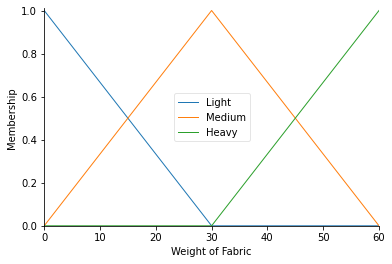

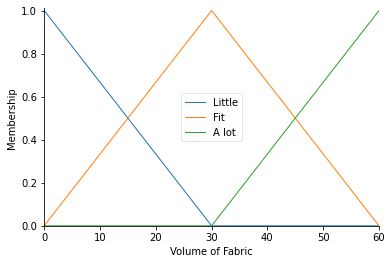

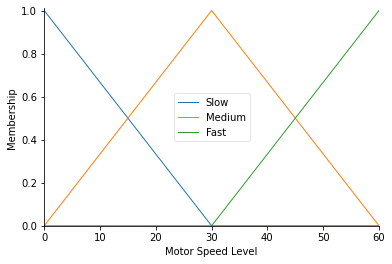

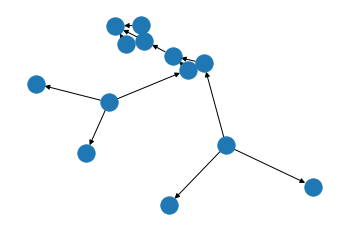

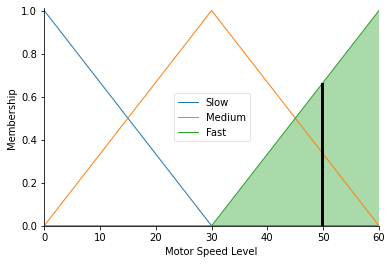

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# New Antecedent/Consequent objects hold universe variables and membership
# functions
weight = ctrl.Antecedent(np.arange(0, 61, 1), 'Weight of Fabric')
volume = ctrl.Antecedent(np.arange(0, 61, 1), 'Volume of Fabric')
motor_speed = ctrl.Consequent(np.arange(0, 61, 1), 'Motor Speed Level')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# weight.automf(3)
# volume.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
weight['Light'] = fuzz.trimf(weight.universe, [0, 0, 30])
weight['Medium'] = fuzz.trimf(weight.universe, [0, 30, 60])
weight['Heavy'] = fuzz.trimf(weight.universe, [30, 60, 60])

volume['Little'] = fuzz.trimf(volume.universe, [0, 0, 30])
volume['Fit'] = fuzz.trimf(volume.universe, [0, 30, 60])
volume['A lot'] = fuzz.trimf(volume.universe, [30, 60, 60])

motor_speed['Slow'] = fuzz.trimf(motor_speed.universe, [0, 0, 30])
motor_speed['Medium'] = fuzz.trimf(motor_speed.universe, [0, 30, 60])
motor_speed['Fast'] = fuzz.trimf(motor_speed.universe, [30, 60, 60])
# You can see how these look with .view()
weight.view()
volume.view()
motor_speed.view()

rule1 = ctrl.Rule(weight['Light'] & volume['Little'], motor_speed['Slow'])
rule2 = ctrl.Rule(weight['Medium'] | volume['Fit'], motor_speed['Medium'])
rule3 = ctrl.Rule(weight['Heavy'] & volume['A lot'], motor_speed['Fast'])

rule4 = ctrl.Rule(weight['Light'] & volume['A lot'], motor_speed['Fast'])
rule5 = ctrl.Rule(weight['Heavy'] & volume['Little'], motor_speed['Medium'])

rule1.view()
motor_speedping_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5])
motor_speedping = ctrl.ControlSystemSimulation(motor_speedping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)

w = input("กรุณาป้อนน้ำหนักของผ้า 0 - 20 กิโลกรัม :")
v = input("กรุณาป้อนบริมาณของผ้า 0 - 1.5 ลูกบาศก์เมตร :")
W = int(w)
V = float(v)
motor_speedping.input['Weight of Fabric'] = int(W)*3
motor_speedping.input['Volume of Fabric'] = int(V*10)*4

# Crunch the numbers
motor_speedping.compute()
motor_speed.view(sim=motor_speedping)
print(motor_speedping.output['Motor Speed Level'], "คะแนน")
print("ความแรงการหมุนของมอเตอร์ที่เหมาะสมต่อการซักผ้า คือ ระดับ :",
      motor_speedping.output['Motor Speed Level']/6)
